In [136]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import time

import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.DataFrame()

for i in range(2000, 2024):
    time.sleep(2.5)
    string = f"{i-1}-{i}"
    url = f"https://fbref.com/en/comps/Big5/{string}/stats/players/{string}-Big-5-European-Leagues-Stats"
    
    data = pd.read_html(url)[0]
    data.columns = data.columns.droplevel(0)
    data = data[['Player', 'Nation', 'Min']]
    data = data[data['Player'] != 'Player']
    data = data.fillna(0)

    data['Player'] = data['Player'].astype("string")
    data['Nation'] = data['Nation'].astype("string")
    data['Min'] = data['Min'].astype(int)
    data['Season'] = string

    data = data.reset_index(drop = True)
    
    df = pd.concat([df, data], axis = 0)
    
    print(f"Season {string} is done!")

Season 1999-2000 is done!
Season 2000-2001 is done!
Season 2001-2002 is done!
Season 2002-2003 is done!
Season 2003-2004 is done!
Season 2004-2005 is done!
Season 2005-2006 is done!
Season 2006-2007 is done!
Season 2007-2008 is done!
Season 2008-2009 is done!
Season 2009-2010 is done!
Season 2010-2011 is done!
Season 2011-2012 is done!
Season 2012-2013 is done!
Season 2013-2014 is done!
Season 2014-2015 is done!
Season 2015-2016 is done!
Season 2016-2017 is done!
Season 2017-2018 is done!
Season 2018-2019 is done!
Season 2019-2020 is done!
Season 2020-2021 is done!
Season 2021-2022 is done!
Season 2022-2023 is done!


In [40]:
df.head(10)

,Player,Nation,Min,Season
0,Jacques Abardonado,fr FRA,950,1999-2000
1,Christian Abbiati,it ITA,2610,1999-2000
2,Nelson Abeijón,uy URU,393,1999-2000
3,Fabrice Abriel,fr FRA,9,1999-2000
4,Roberto Acuña,py PAR,2616,1999-2000
5,Adaílton,br BRA,1437,1999-2000
6,Frédéric Adam,fr FRA,2476,1999-2000
7,Tony Adams,eng ENG,1890,1999-2000
8,Daniele Adani,it ITA,2089,1999-2000
9,Otto Addo,gh GHA,1572,1999-2000


In [43]:
minutes_by_season = df.groupby(['Season']).sum()

In [60]:
seasons_as_index = minutes_by_season.index.tolist()

In [45]:
grouped = df.groupby(['Nation', 'Season'], as_index = False).sum()

In [71]:
ita = grouped.loc[grouped['Nation'] == "it ITA"]
ita = ita.rename(columns = {'Min':'Ita'})
ita_mins = ita['Ita']
ita_mins = ita_mins.reset_index(drop=True)
ita_mins.index = seasons_as_index

fra = grouped.loc[grouped['Nation'] == "fr FRA"]
fra = fra.rename(columns = {'Min':'Fra'})
fra_mins = fra['Fra']
fra_mins = fra_mins.reset_index(drop=True)
fra_mins.index = seasons_as_index

eng = grouped.loc[grouped['Nation'] == "eng ENG"]
eng = eng.rename(columns = {'Min':'Eng'})
eng_mins = eng['Eng']
eng_mins = eng_mins.reset_index(drop=True)
eng_mins.index = seasons_as_index

esp = grouped.loc[grouped['Nation'] == "es ESP"]
esp = esp.rename(columns = {'Min':'Esp'})
esp_mins = esp['Esp']
esp_mins = esp_mins.reset_index(drop=True)
esp_mins.index = seasons_as_index

ger = grouped.loc[grouped['Nation'] == "de GER"]
ger = ger.rename(columns = {'Min':'Ger'})
ger_mins = ger['Ger']
ger_mins = ger_mins.reset_index(drop=True)
ger_mins.index = seasons_as_index

cro = grouped.loc[grouped['Nation'] == "hr CRO"]
cro = cro.rename(columns = {'Min':'Cro'})
cro_mins = cro['Cro']
cro_mins = cro_mins.reset_index(drop=True)
cro_mins.index = seasons_as_index

In [74]:
nations = pd.concat([ita_mins, fra_mins, eng_mins, esp_mins,
                    ger_mins, cro_mins, minutes_by_season], axis=1)

In [78]:
nations['Ita%'] = round(nations['Ita'] / nations['Min'], 3) * 100
nations['Fra%'] = round(nations['Fra'] / nations['Min'], 3) * 100
nations['Eng%'] = round(nations['Eng'] / nations['Min'], 3) * 100
nations['Esp%'] = round(nations['Esp'] / nations['Min'], 3) * 100
nations['Ger%'] = round(nations['Ger'] / nations['Min'], 3) * 100
nations['Cro%'] = round(nations['Cro'] / nations['Min'], 3) * 100

In [79]:
nations

,Ita,Fra,Eng,Esp,Ger,Cro,Min,Ita%,Fra%,Eng%,Esp%,Ger%,Cro%
1999-2000,428743,507706,335526,451166,363319,30584,3310986,12.9,15.3,10.1,13.6,11.0,0.9
2000-2001,415237,486934,342417,478689,319688,45267,3312999,12.5,14.7,10.3,14.4,9.6,1.4
2001-2002,435842,480994,316783,508232,299882,39070,3306954,13.2,14.5,9.6,15.4,9.1,1.2
2002-2003,427566,560293,286110,507272,261343,38821,3447049,12.4,16.3,8.3,14.7,7.6,1.1
2003-2004,419603,534736,281961,481673,279609,35012,3453210,12.2,15.5,8.2,13.9,8.1,1.0
2004-2005,547903,501913,288485,519901,285263,25151,3600436,15.2,13.9,8.0,14.4,7.9,0.7
2005-2006,540046,493806,288395,501554,283709,22662,3602929,15.0,13.7,8.0,13.9,7.9,0.6
2006-2007,568829,496571,294246,474467,276128,20601,3602882,15.8,13.8,8.2,13.2,7.7,0.6
2007-2008,536846,521117,261978,477790,272409,40994,3604830,14.9,14.5,7.3,13.3,7.6,1.1
2008-2009,485301,497472,277260,499923,254842,35441,3604694,13.5,13.8,7.7,13.9,7.1,1.0


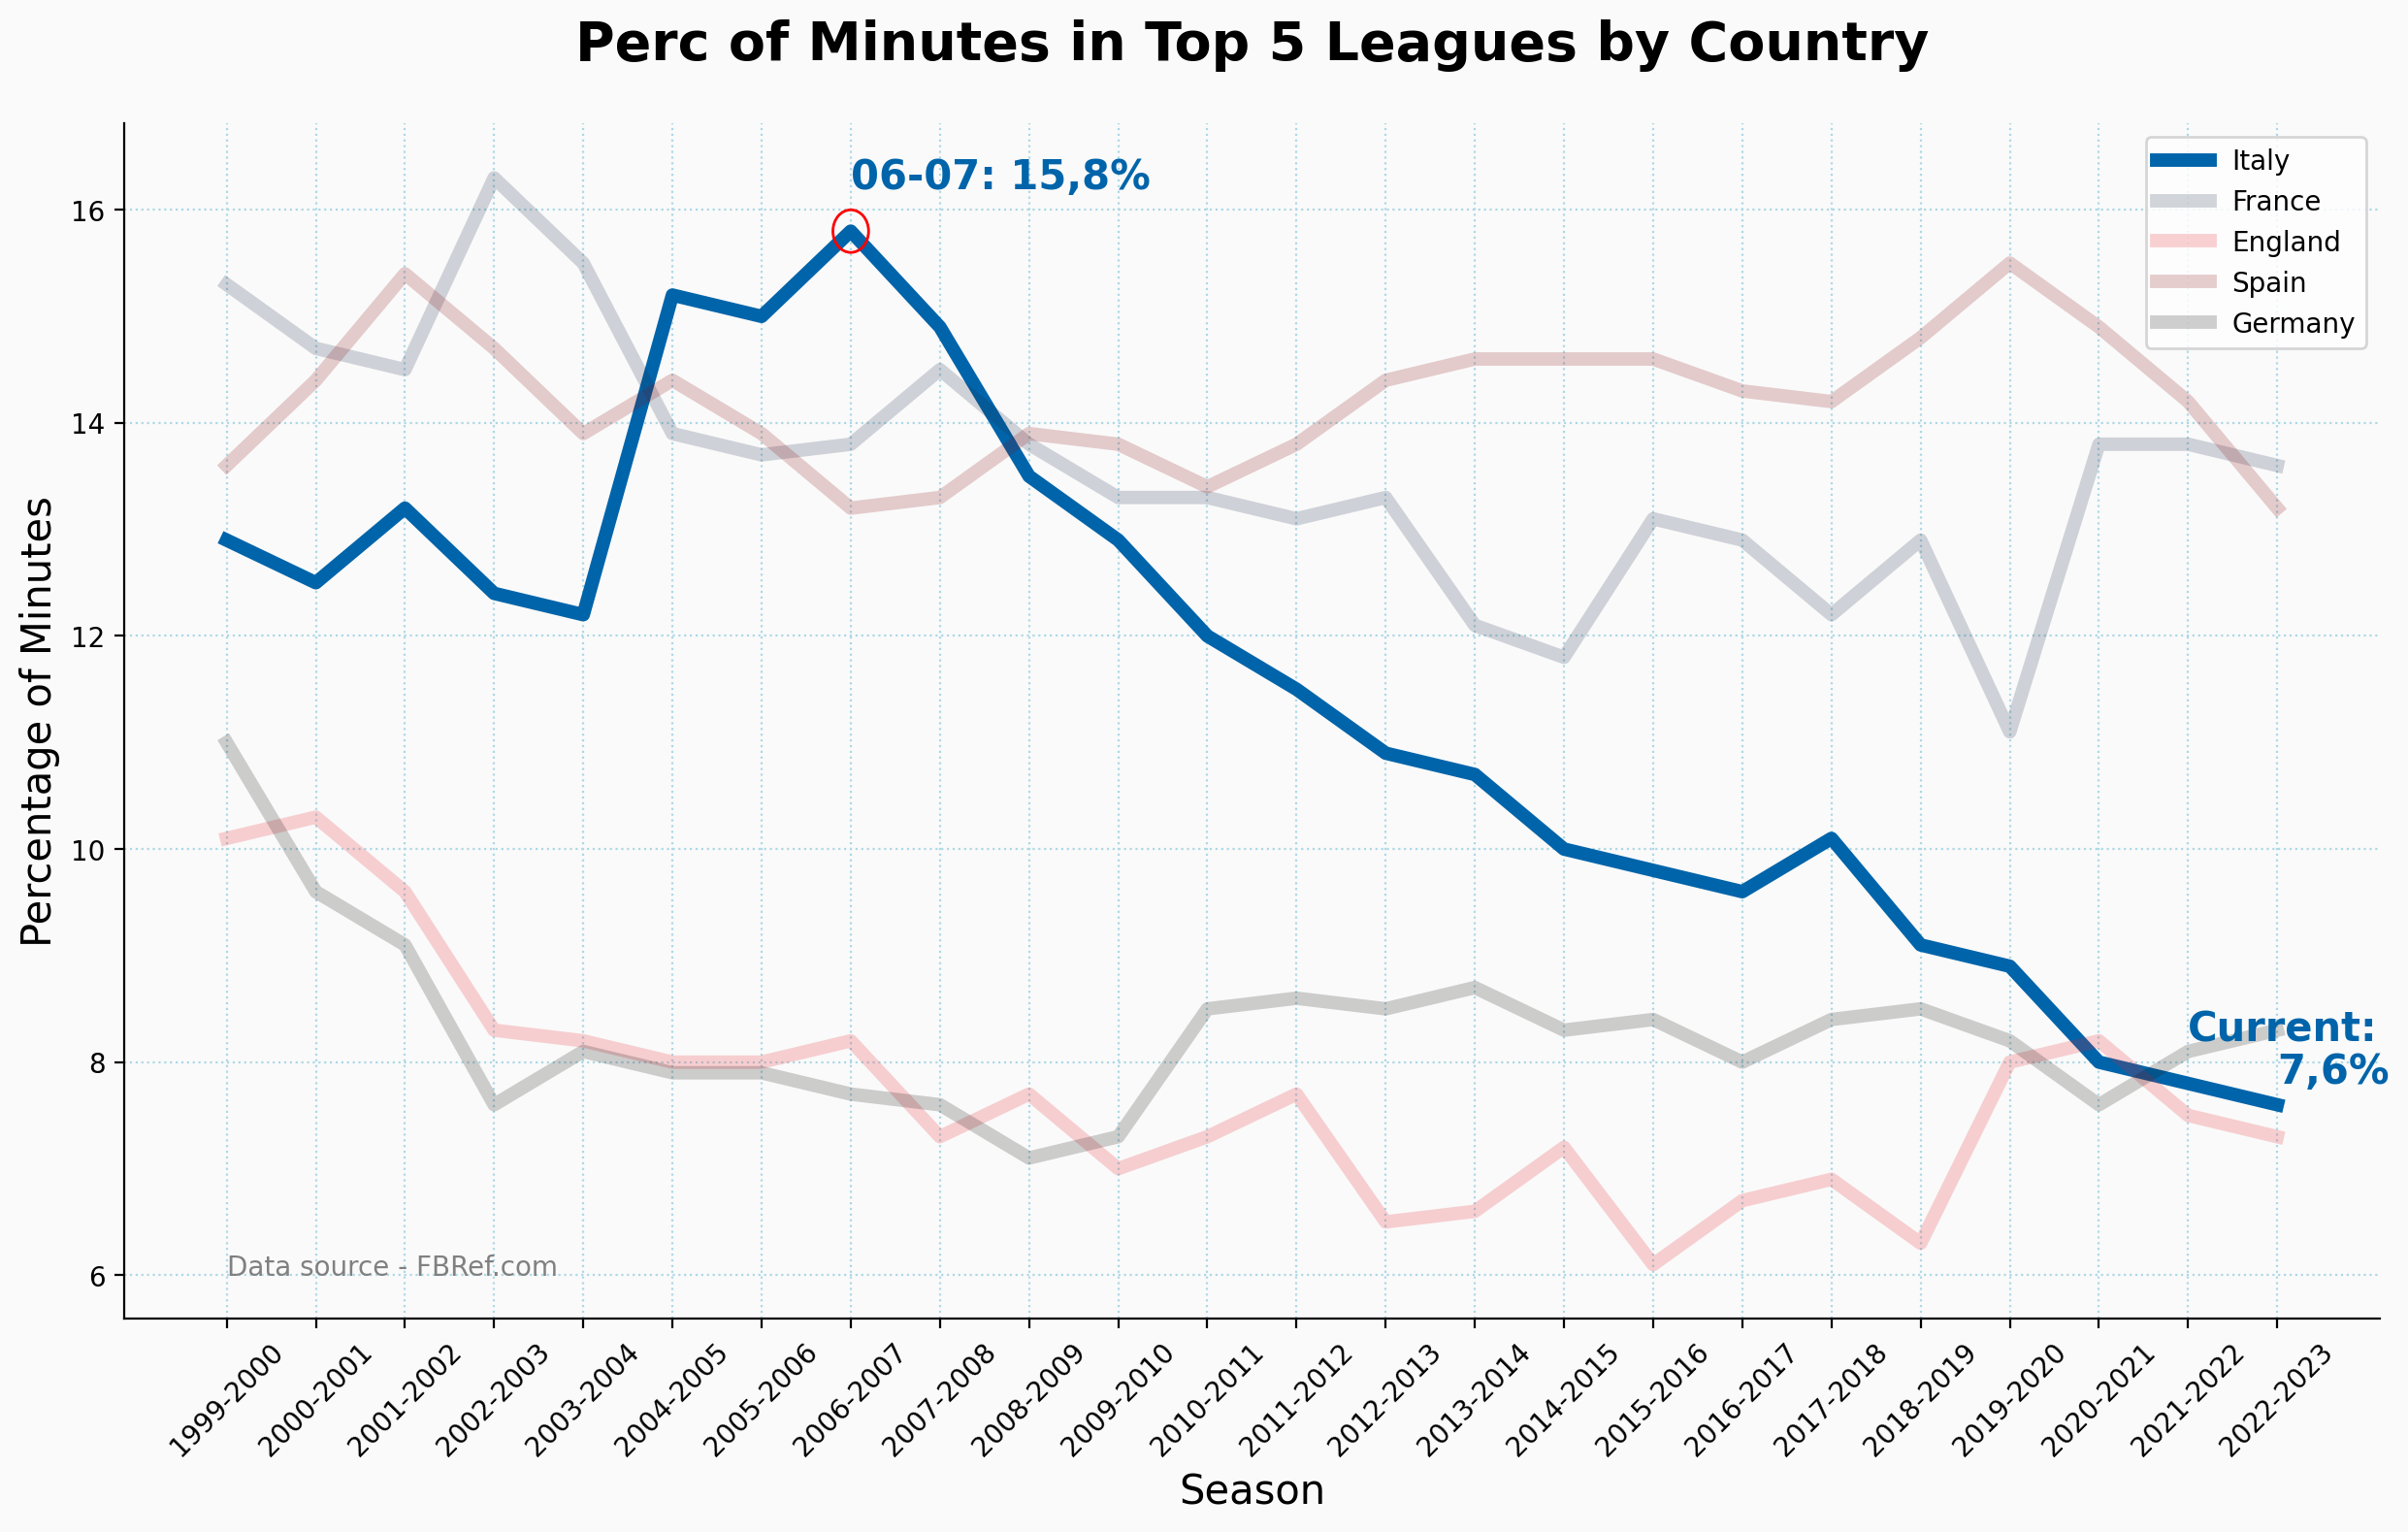

In [162]:
plt.figure(figsize = (15, 8), dpi = 200, facecolor = "#fafafa")

ax = plt.axes()
ax.set_facecolor("#fafafa")

ax.grid(True, c = "lightblue", ls = ":")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticklabels(nations.index, rotation = 45)

plt.title("Perc of Minutes in Top 5 Leagues by Country", fontsize = 20, y = 1.04, fontweight = "bold")

ax.set_xlabel("Season", fontsize = 15)
ax.set_ylabel("Percentage of Minutes", fontsize = 15)

ax.plot(nations.index.values, nations['Ita%'], linewidth = 5, color = "#0064aa", label = "Italy", zorder = 2)
ax.plot(nations.index.values, nations['Fra%'], linewidth = 5, color = "#21304d", label = "France", alpha = 0.2)
ax.plot(nations.index.values, nations['Eng%'], linewidth = 5, color = "#ea1f29", label = "England", alpha = 0.2)
ax.plot(nations.index.values, nations['Esp%'], linewidth = 5, color = "#8b0d11", label = "Spain", alpha = 0.2)
ax.plot(nations.index.values, nations['Ger%'], linewidth = 5, color = "#161413", label = "Germany", alpha = 0.2)

circle = plt.Circle(("2006-2007", 15.8), 0.2, color = "red", fill = False, zorder = 3)

ax.add_patch(circle)

ax.text("2006-2007", 16.2, "06-07: 15,8%",fontsize = 15, color = "#0064aa", fontweight = "bold")
ax.text("2021-2022", 8.2, "Current:", fontsize = 15, color = "#0064aa", fontweight = "bold")
ax.text("2022-2023", 7.8, "7,6%", fontsize = 15, color = "#0064aa", fontweight = "bold")

ax.text("1999-2000", 6, "Data source - FBRef.com", color = "grey")

plt.legend()

plt.show()